## MLP，从零开始

In [1]:
import torch
import sys
sys.path.append('..')
import utils
import d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, '../data', 4)

### 1.初始化模型参数

- 单隐藏层，256个单元；
- 通常选择2的若干次幂作为层的宽度，因为内存在硬件中的分配和寻址方式，这样更高效。

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.normal(0, 0.01, size=(num_inputs, num_hiddens), requires_grad=True)
b1 = torch.zeros(num_hiddens, requires_grad=True)
W2 = torch.normal(0, 0.01, size=(num_hiddens, num_outputs), requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2]

### 2.激活函数

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(a, X)

### 3.模型

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)           # 这里@等价于torch.mm
    return H @ W2 + b2

loss = d2l.CrossEntropyLoss

### 4.训练

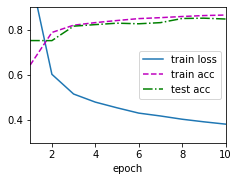

In [5]:
num_epochs, lr = 10, 0.1

def updater(batch_size):
    return d2l.sgd(params, lr, batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)